# **Problem Statement:**

You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

**Importing The Necessary Libraries**

In [1]:
import pandas as pd #data manipulation
import numpy as np  #numerical python
import matplotlib.pyplot as plt #data visualization
%matplotlib inline
import seaborn as sns #data visualization
import plotly.express as px #data visualization
import plotly.graph_objects as go #data visualization
from plotly.subplots import make_subplots #to make subplots
import os
from IPython.display import Markdown
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore') #to ignore warnings

In [2]:
from sklearn.preprocessing import StandardScaler #for rescalling the data
from sklearn.preprocessing import LabelEncoder #for encoding

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import*

**Importing The Dataset**

In [3]:
df=pd.read_csv('dataset.csv')

**Interpreting The Dataset**

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Dropping The Duplicates**

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

**Information about The Dataset**

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Multivariate Analysis**

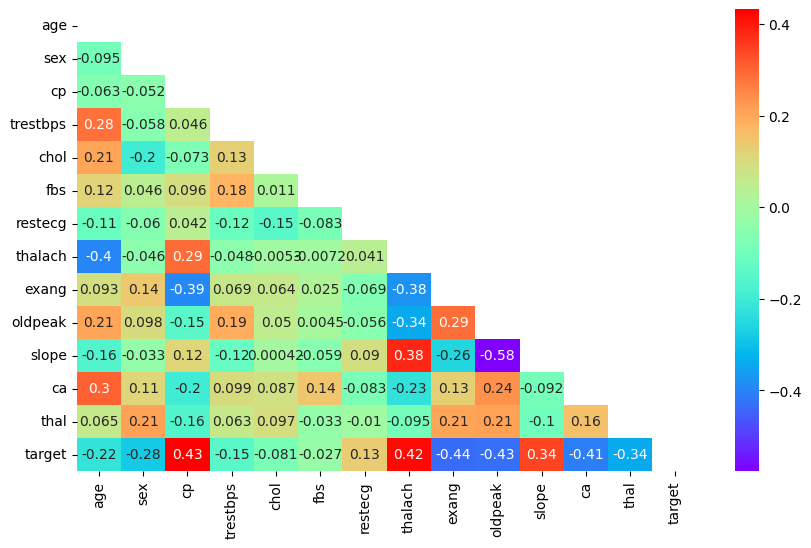

In [12]:
plt.figure(figsize=(10,6))
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),annot=True,cmap='rainbow',mask=mask)
plt.show()

# **Data Visualization**

In [13]:
def save_and_display_plot(fig,filename,folder='plots'):
 os.makedirs(folder,exist_ok=True)
 filepath=os.path.join(folder,filename)
 pio.write_image(fig,filepath)
 display(Markdown(f"![{filename}]({filepath})"))

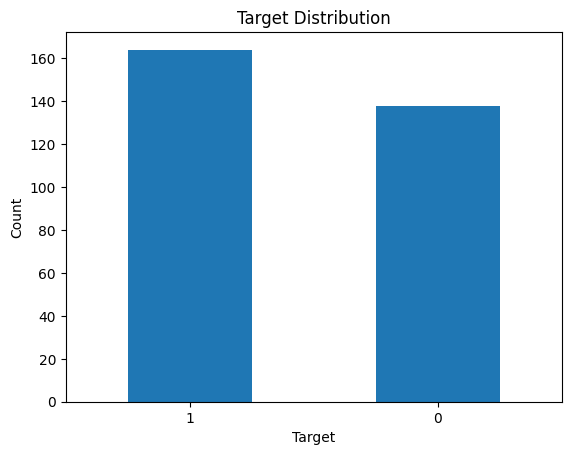

In [14]:
df['target'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

Number of persons with heart disease is more as compared to persons with no heart disease.

# **Age vs Target**

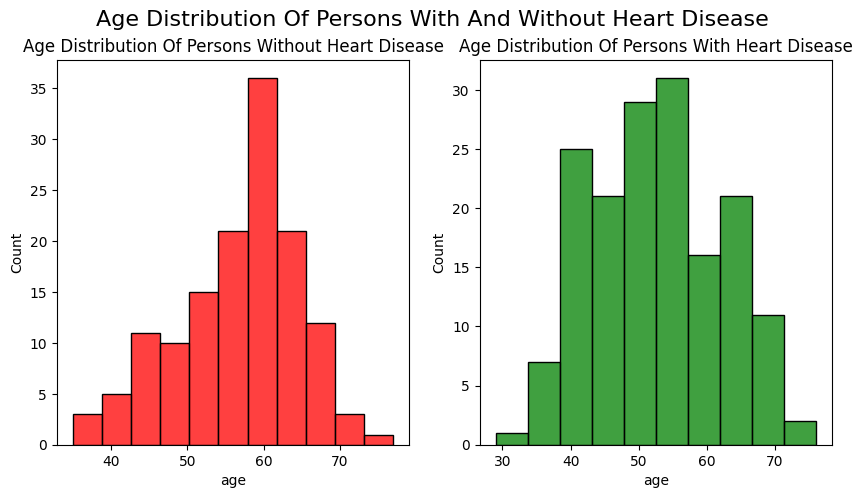

In [15]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df[df['target']==0]['age'],ax=axes[0],color='red')
axes[0].set_title('Age Distribution Of Persons Without Heart Disease')
sns.histplot(df[df['target']==1]['age'],ax=axes[1],color='green')
axes[1].set_title('Age Distribution Of Persons With Heart Disease')
plt.suptitle('Age Distribution Of Persons With And Without Heart Disease',fontsize=16)
plt.show()

# **Sex vs Target**

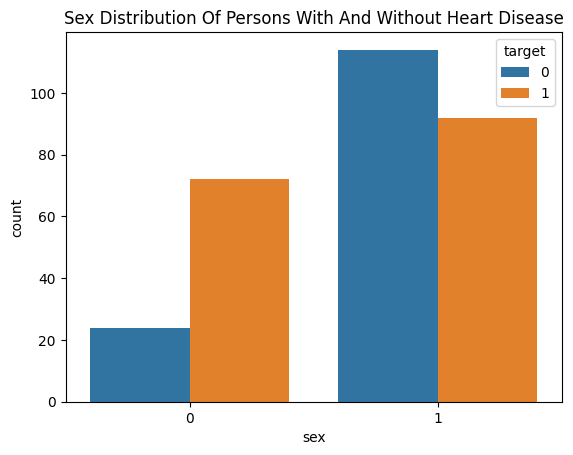

In [16]:
sns.countplot(x='sex',hue='target',data=df)
plt.title('Sex Distribution Of Persons With And Without Heart Disease')
plt.show()

# **Cp vs Target**

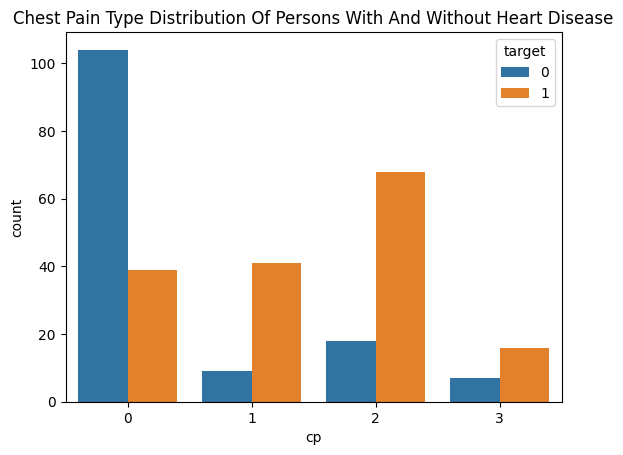

In [17]:
sns.countplot(x='cp',hue='target',data=df)
plt.title('Chest Pain Type Distribution Of Persons With And Without Heart Disease')
plt.show()

# **Trestbps vs Target**

In [18]:
fig_box = px.box(df, x='target', y='trestbps', color='target',
                 title='rest bps Distribution by Disease Status',
                 labels={'target': 'Disease Status (0=No Disease, 1=Disease)', 'trestbps': 'trestbps'},
                 width=700, height=500)
save_and_display_plot(fig_box,'Trestbps_vs_target.png')
fig_box.show()

![Trestbps_vs_target.png](plots/Trestbps_vs_target.png)

# **Cholestrol vs Target**

In [19]:
fig_box = px.box(df, x='target', y='chol', color='target',
                 title='cholestrol Distribution by Disease Status',
                 labels={'target': 'Disease Status (0=No Disease, 1=Disease)', 'chol': 'Chol'},
                 width=700, height=500)
save_and_display_plot(fig_box,'cholestrol_vs_target.png')
fig_box.show()

![cholestrol_vs_target.png](plots/cholestrol_vs_target.png)

# **Fasting Blood sugar vs Target**

In [20]:
fig=px.histogram(df,x='fbs',color='target',barmode='group',
                 title='Fasting Blood Sugar Distribution By Disease Status',
                 labels={'fbs':'Fasting Blood Sugar','target':'Disease Status (0=No Disease,1=Disease)'},
                 width=700,height=500)
save_and_display_plot(fig,'blood_sugar_vs_target.png')
fig.show()

![blood_sugar_vs_target.png](plots/blood_sugar_vs_target.png)

# **Logistic Regression**

In [21]:
x=df.drop('target',axis=1)
y=df['target']

In [22]:
#splitting the data into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [23]:
#fitting the model to data
lr1=LogisticRegression()
lr1.fit(x_train,y_train)

LogisticRegression()

In [24]:
#predicting on x_test
pred1=lr1.predict(x_test)

In [25]:
#evaluating the model
accuracy_of_lr1=accuracy_score(y_test,pred1)
print('Accuracy of Logistic Regression Model:',accuracy_of_lr1)

Accuracy of Logistic Regression Model: 0.8791208791208791


In [26]:
cm1=confusion_matrix(y_test,pred1)
cm1

array([[32,  8],
       [ 3, 48]])

# **Decision Tree**

In [27]:
#fitting the model to data
dt1=DecisionTreeClassifier(random_state=20)
dt1.fit(x_train,y_train)


DecisionTreeClassifier(random_state=20)

In [28]:
#predicting the values using x_test
pred2=dt1.predict(x_test)

In [29]:
#evaluating the model
accuracy_of_dt2=accuracy_score(y_test,pred2)
print('Accuracy of Decision Tree Model:',accuracy_of_dt2)

Accuracy of Decision Tree Model: 0.7802197802197802


In [30]:
cm2=confusion_matrix(y_test,pred2)
cm2

array([[31,  9],
       [11, 40]])

In [31]:
from sklearn import tree
import graphviz as gv
dot_data = tree.export_graphviz(
    dt1,
    out_file=None,
    feature_names=x.columns,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = gv.Source(dot_data, format="pdf")
graph.render('decision_tree')
graph.view()

'decision_tree.pdf'

# **Random Forest Classifier**

In [32]:
#fitting the model to data
rf3=RandomForestClassifier(random_state=30)
rf3.fit(x_train,y_train)

RandomForestClassifier(random_state=30)

In [33]:
#predicting using x_test
pred3=rf3.predict(x_test)

In [34]:
#evaluating the Model
accuracy_of_rf=accuracy_score(y_test,pred3)
print('Accuracy of Random Forest Classifier Model:',accuracy_of_rf)

Accuracy of Random Forest Classifier Model: 0.8791208791208791


In [35]:
#plotting the random forest using graphviz
dot_data=tree.export_graphviz(rf3.estimators_[0],out_file=None,feature_names=x.columns,class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph=gv.Source(dot_data,format='pdf')
graph.render('random_Forest')
graph.view()

'random_Forest.pdf'

In [36]:
cm3=confusion_matrix(y_test,pred3)

In [37]:
#confusion matrix of all models
print('Confusion Matrix Of Logistic Regression Model:\n',cm1)
print('Confusion Matrix Of Decision Tree Model:\n',cm2)
print('Confusion Matrix Of Random Forest Classifier Model:\n',cm3)

Confusion Matrix Of Logistic Regression Model:
 [[32  8]
 [ 3 48]]
Confusion Matrix Of Decision Tree Model:
 [[31  9]
 [11 40]]
Confusion Matrix Of Random Forest Classifier Model:
 [[34  6]
 [ 5 46]]


In [38]:
#classification report of all models
print('Classification Report Of Logistic Regression Model:\n',classification_report(y_test,pred1))
print('Classification Report Of Decision Tree Model:\n',classification_report(y_test,pred2))
print('Classification Report Of Random Forest Classifier Model:\n',classification_report(y_test,pred3))
#

Classification Report Of Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85        40
           1       0.86      0.94      0.90        51

    accuracy                           0.88        91
   macro avg       0.89      0.87      0.88        91
weighted avg       0.88      0.88      0.88        91

Classification Report Of Decision Tree Model:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        40
           1       0.82      0.78      0.80        51

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

Classification Report Of Random Forest Classifier Model:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.88      0.90      0.89        51

    accuracy            

In [39]:
#recall and F1 score of all models
print('Recall And F1 Score Of Logistic Regression Model:\n',recall_score(y_test,pred1),f1_score(y_test,pred1))
print('Recall And F1 Score Of Decision Tree Model:\n',recall_score(y_test,pred2),f1_score(y_test,pred2))
print('Recall And F1 Score Of Random Forest Classifier Model:\n',recall_score(y_test,pred3),f1_score(y_test,pred3))


Recall And F1 Score Of Logistic Regression Model:
 0.9411764705882353 0.897196261682243
Recall And F1 Score Of Decision Tree Model:
 0.7843137254901961 0.8
Recall And F1 Score Of Random Forest Classifier Model:
 0.9019607843137255 0.8932038834951457


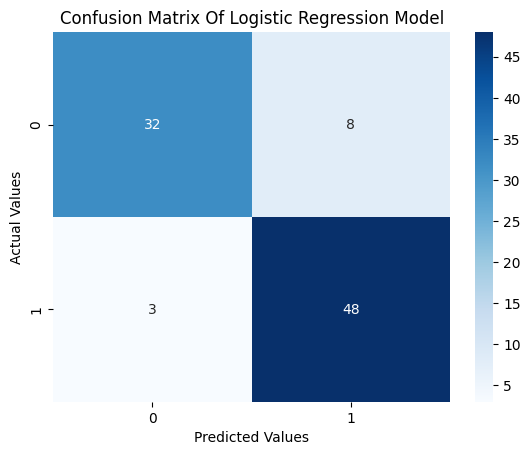

In [40]:
#confusion matrix of logistic regression model
sns.heatmap(cm1,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix Of Logistic Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

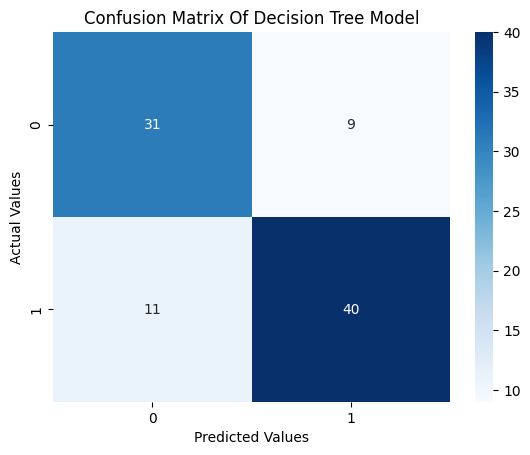

In [41]:
#confusion matrix heatmap of decision tree model
sns.heatmap(cm2,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix Of Decision Tree Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

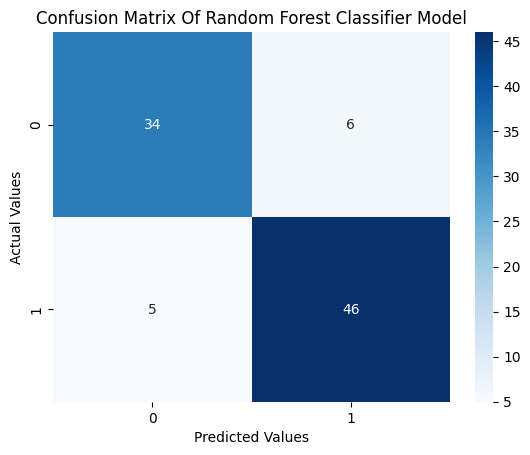

In [42]:
#confusion matrix heatmap of logistic regression model
sns.heatmap(cm3,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix Of Random Forest Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
accuracy_df=pd.DataFrame({'Model':["logistic regression",'decision tree','random forest'],'Accuracy':[accuracy_of_lr1,accuracy_of_dt2,accuracy_of_rf]})
accuracy_df

,Model,Accuracy
0,logistic regression,0.879121
1,decision tree,0.780220
2,random forest,0.879121


In [44]:
print("Best model is Logistic Regression:\naccuracy of model is",accuracy_of_lr1)

Best model is Logistic Regression:
accuracy of model is 0.8791208791208791
